# Decomposition

In [1]:
import EFGs
EFGs.__version__

'0.8.4'

In [2]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit import Chem
from EFGs import mol2frag, cleavage

In [3]:
from collections import Counter, defaultdict
import pickle

In [4]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [5]:
smi_df = pd.read_csv('data/GDSC/drug_smiles.csv')
smi_df

,name,CID,CanonicalSMILES,IsomericSMILES
0,SNX-2112,24772860,CC1(CC2=C(C(=O)C1)C(=NN2C3=CC(=C(C=C3)C(=O)N)N...,CC1(CC2=C(C(=O)C1)C(=NN2C3=CC(=C(C=C3)C(=O)N)N...
1,TPCA-1,9903786,C1=CC(=CC=C1C2=CC(=C(S2)NC(=O)N)C(=O)N)F,C1=CC(=CC=C1C2=CC(=C(S2)NC(=O)N)C(=O)N)F
2,Quizartinib,24889392,CC(C)(C)C1=CC(=NO1)NC(=O)NC2=CC=C(C=C2)C3=CN4C...,CC(C)(C)C1=CC(=NO1)NC(=O)NC2=CC=C(C=C2)C3=CN4C...
3,Tubastatin A,49850262,CN1CCC2=C(C1)C3=CC=CC=C3N2CC4=CC=C(C=C4)C(=O)NO,CN1CCC2=C(C1)C3=CC=CC=C3N2CC4=CC=C(C=C4)C(=O)NO
4,Trametinib,11707110,CC1=C2C(=C(N(C1=O)C)NC3=C(C=C(C=C3)I)F)C(=O)N(...,CC1=C2C(=C(N(C1=O)C)NC3=C(C=C(C=C3)I)F)C(=O)N(...
...,...,...,...,...
218,RO-3306,11631681,C1=CC2=C(C=CC(=C2)C=C3C(=O)N=C(S3)NCC4=CC=CS4)...,C1=CC2=C(C=CC(=C2)/C=C\3/C(=O)N=C(S3)NCC4=CC=C...
219,Sepantronium bromide,11178236,CC1=[N+](C2=C(N1CCOC)C(=O)C3=CC=CC=C3C2=O)CC4=...,CC1=[N+](C2=C(N1CCOC)C(=O)C3=CC=CC=C3C2=O)CC4=...
220,Vismodegib,24776445,CS(=O)(=O)C1=CC(=C(C=C1)C(=O)NC2=CC(=C(C=C2)Cl...,CS(=O)(=O)C1=CC(=C(C=C1)C(=O)NC2=CC(=C(C=C2)Cl...
221,PI-103,9884685,C1COCCN1C2=NC(=NC3=C2OC4=C3C=CC=N4)C5=CC(=CC=C5)O,C1COCCN1C2=NC(=NC3=C2OC4=C3C=CC=N4)C5=CC(=CC=C5)O


In [6]:
drug_smi = smi_df['CanonicalSMILES'].values.tolist()
drug_smi

['CC1(CC2=C(C(=O)C1)C(=NN2C3=CC(=C(C=C3)C(=O)N)NC4CCC(CC4)O)C(F)(F)F)C',
 'C1=CC(=CC=C1C2=CC(=C(S2)NC(=O)N)C(=O)N)F',
 'CC(C)(C)C1=CC(=NO1)NC(=O)NC2=CC=C(C=C2)C3=CN4C5=C(C=C(C=C5)OCCN6CCOCC6)SC4=N3',
 'CN1CCC2=C(C1)C3=CC=CC=C3N2CC4=CC=C(C=C4)C(=O)NO',
 'CC1=C2C(=C(N(C1=O)C)NC3=C(C=C(C=C3)I)F)C(=O)N(C(=O)N2C4=CC(=CC=C4)NC(=O)C)C5CC5',
 'CC(C)(C)OC(=O)NC1=CC=C(C=C1)C2=CC(=NO2)C(=O)NCCCCCCC(=O)NO',
 'CCN1C=C(C(=N1)C2=CC=C(C=C2)NC(=O)N(C)C)C3=C4C=C(NC4=NC=C3)C5=CC(=CC=C5)CN(C)C',
 'CCN1CCN(CC1)CC2=C(C=C(C=C2)NC(=O)C3=CC(=C(C=C3)C)OC4=C5C=CNC5=NC=C4)C(F)(F)F',
 'CC(CS(=O)(=O)C1=CC=C(C=C1)F)(C(=O)NC2=CC(=C(C=C2)C#N)C(F)(F)F)O',
 'CC1CCC2CC(C(=CC=CC=CC(CC(C(=O)C(C(C(=CC(C(=O)CC(OC(=O)C3CCCCN3C(=O)C(=O)C1(O2)O)C(C)CC4CCC(C(C4)OC)O)C)C)O)OC)C)C)C)OC',
 'CN1CCN(CC1)C2=CC=C(C3=NO[N+](=C23)[O-])[N+](=O)[O-]',
 'CC1=CN=C(C(=N1)OC)NS(=O)(=O)C2=C(N=CC=C2)C3=CC=C(C=C3)C4=NN=CO4',
 'CC1=CC=C(C=C1)N2C(=CC(=N2)C(C)(C)C)NC(=O)NC3=CC=C(C4=CC=CC=C43)OCCN5CCOCC5',
 'CN1CCN(CC1)CCOC2=CC(=C3C(=C2)N=CN=C3NC4=C(

In [7]:
decoding_voc = Counter()
for smiles in tqdm(drug_smi):
    mol = Chem.MolFromSmiles(smiles)
    a,b=mol2frag(mol, isomericSmiles=False)
    decoding_voc.update(a+b)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 223/223 [00:04<00:00, 49.37it/s]


In [8]:
decoding_voc

Counter({'C=O': 21,
         'NC=O': 100,
         'N': 241,
         'O': 242,
         'F': 122,
         'c1cn[nH]c1': 11,
         'c1ccccc1': 257,
         'C010': 408,
         'C040': 89,
         'C020': 190,
         'C030': 257,
         'CC': 236,
         'NC(N)=O': 14,
         'c1ccsc1': 9,
         'c1cnoc1': 3,
         'c1ccc2c(c1)sc1nccn12': 1,
         'O=CNO': 8,
         'c1ccc2[nH]ccc2c1': 15,
         'I': 4,
         'O=c1cc2[nH]c(=O)[nH]c(=O)c2c[nH]1': 1,
         'NC(=O)O': 9,
         'CCCCCC': 3,
         'c1cnc2[nH]ccc2c1': 8,
         'O=S=O': 11,
         'C#N': 12,
         'C=CC=CC=C': 2,
         'C=C': 24,
         'O=CO': 40,
         'NC(=O)C(=O)C(O)O': 2,
         'CCCC': 16,
         'O=[N+][O-]': 2,
         '[O-][n+]1onc2ccccc21': 1,
         'NS(=O)=O': 17,
         'c1cnccn1': 4,
         'c1ccncc1': 36,
         'c1nnco1': 1,
         'c1ccc2ccccc2c1': 5,
         'OCO': 12,
         'Cl': 57,
         'c1ccc2ncncc2c1': 11,
         'C=CC(N)=

In [9]:
# cleavage(decoding_voc, alpha=0.8)
# decoding_voc

In [10]:
with open('data/GDSC/decoding_vocabulary.pkl', 'wb') as file:
    pickle.dump(decoding_voc, file)

In [11]:
smi = drug_smi[2]
mol = Chem.MolFromSmiles(smi)
mol2frag(mol, toEnd=True, vocabulary=list(decoding_voc))

(['O', 'NC(N)=O', 'O', 'N', 'c1cnoc1', 'c1ccccc1', 'c1ccc2c(c1)sc1nccn12'],
 ['C010', 'C040', 'C010', 'C010', 'CC', 'CC', 'CC'])

# Visualization

In [12]:
from IPython.display import SVG, Image
from rdkit import Chem
from rdkit.Chem import rdDepictor,Descriptors
from rdkit.Chem.Draw import rdMolDraw2D
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import re
from EFGs import mol2frag
from rdkit import Geometry

In [13]:
def prettymol(smiles, asMol=False, label=None, path='', imgsize=(300, 200), highlights=None, score=None):
    '''
    highlights is a dictionary, which may contains:
    highlightAtoms: list
    highlightBonds: list
    highlightAtomRadii: dict[int]=float, atom index (int), radius (float)
    highlightAtomColors: dict[int]=tuple, index (int), color (tuple, length=3)
    highlightBondColors: dict[int]=tuple,index (int), color (tuple, length=3)
    '''
    if asMol:
        mol = smiles.__copy__()
    else:
        mol = Chem.MolFromSmiles(smiles)
    try:
        mol = rdMolDraw2D.PrepareMolForDrawing(mol)
        if '.png' in path:
            drawer = rdMolDraw2D.MolDraw2DCairo(*imgsize)
        else:
            drawer = rdMolDraw2D.MolDraw2DSVG(*imgsize)
        opts = drawer.drawOptions()
        if label == 'map':
            for i in range(mol.GetNumAtoms()):
                opts.atomLabels[i] = mol.GetAtomWithIdx(
                    i).GetSymbol()+str(mol.GetAtomWithIdx(i).GetAtomMapNum())
        if label == 'idx':
            for i in range(mol.GetNumAtoms()):
                opts.atomLabels[i] = mol.GetAtomWithIdx(i).GetSymbol()+str(i)
        if label == 'score':
            assert score is not None
#             tmp_score_dict = score
#             atoms = mol.GetAtoms()
#             for atom_id, s in tmp_score_dict.items():
#                 atom = atoms[atom_id]
#                 atom.SetProp("atomNote", s)
                
            for atom in mol.GetAtoms():
                idx = atom.GetIdx()
                if idx in score.keys():
                    atom.SetProp("atomNote", str(round(score[idx], 2)))
        if not highlights:
            drawer.DrawMolecule(mol)
        else:
            drawer.DrawMolecule(mol, **highlights)
        drawer.FinishDrawing()
        if '.png' in path:
            drawer.WriteDrawingText(path)
            display(Image(path))
        else:
            svg = drawer.GetDrawingText()
            display(SVG(svg.replace('svg:','')))
            if '.svg' in path:
                with open(path, 'w') as wf:
                    print(svg, file=wf)
        return drawer
    except Exception as e:
        print("Check your molecule!!!",e)
        return

In [14]:
my_cmap = cm.get_cmap('cool')
patt = r'[C,H][0-9]{2}[0,-1,1]'
# Get normalize function (takes data in range [vmin, vmax] -> [0, 1])
my_norm = Normalize(vmin=0, vmax=100)

In [15]:
a,b,c,d = mol2frag(mol, toEnd=True, vocabulary=list(decoding_voc), returnidx=True)
print(a, b, c, d)

['O', 'NC(N)=O', 'O', 'N', 'c1cnoc1', 'c1ccccc1', 'c1ccc2c(c1)sc1nccn12'] ['C010', 'C040', 'C010', 'C010', 'CC', 'CC', 'CC'] [(34,), (9, 10, 12, 11), (28,), (31,), (5, 6, 7, 8, 4), (16, 17, 18, 13, 14, 15), (25, 26, 27, 22, 23, 24, 37, 38, 39, 19, 20, 21)] [(0,), (1,), (2,), (3,), (29, 30), (32, 33), (35, 36)]


In [16]:
atommap,bondmap = {}, {}
tmp_score_map = {}
for s,i in zip(a+b, c+d):
    print("s and i:", s, i)
    if re.match(patt, s):
        m = Chem.MolFromSmiles(s[0])
    else:
        m = Chem.MolFromSmiles(s)
    mw = Descriptors.HeavyAtomMolWt(m)
    print('heavy atom mol weight:', mw)
    atommap.update({x:my_cmap(my_norm(mw))[:3] for x in i})
    tmp_score_map[i[0]] = mw

s and i: O (34,)
heavy atom mol weight: 15.999
s and i: NC(N)=O (9, 10, 12, 11)
heavy atom mol weight: 56.024
s and i: O (28,)
heavy atom mol weight: 15.999
s and i: N (31,)
heavy atom mol weight: 14.007
s and i: c1cnoc1 (5, 6, 7, 8, 4)
heavy atom mol weight: 66.039
s and i: c1ccccc1 (16, 17, 18, 13, 14, 15)
heavy atom mol weight: 72.06599999999999
s and i: c1ccc2c(c1)sc1nccn12 (25, 26, 27, 22, 23, 24, 37, 38, 39, 19, 20, 21)
heavy atom mol weight: 168.17999999999998
s and i: C010 (0,)
heavy atom mol weight: 12.011
s and i: C040 (1,)
heavy atom mol weight: 12.011
s and i: C010 (2,)
heavy atom mol weight: 12.011
s and i: C010 (3,)
heavy atom mol weight: 12.011
s and i: CC (29, 30)
heavy atom mol weight: 24.022
s and i: CC (32, 33)
heavy atom mol weight: 24.022
s and i: CC (35, 36)
heavy atom mol weight: 24.022


In [17]:
tmp_score_map

{34: 15.999,
 9: 56.024,
 28: 15.999,
 31: 14.007,
 5: 66.039,
 16: 72.06599999999999,
 25: 168.17999999999998,
 0: 12.011,
 1: 12.011,
 2: 12.011,
 3: 12.011,
 29: 24.022,
 32: 24.022,
 35: 24.022}

In [18]:
for b in mol.GetBonds():
    if atommap[b.GetBeginAtomIdx()] == atommap[b.GetEndAtomIdx()]:
        bondmap[b.GetIdx()]=atommap[b.GetBeginAtomIdx()]

In [19]:
atommap, bondmap

({34: (0.1568627450980392, 0.8431372549019608, 1.0),
  9: (0.5607843137254902, 0.4392156862745098, 1.0),
  10: (0.5607843137254902, 0.4392156862745098, 1.0),
  12: (0.5607843137254902, 0.4392156862745098, 1.0),
  11: (0.5607843137254902, 0.4392156862745098, 1.0),
  28: (0.1568627450980392, 0.8431372549019608, 1.0),
  31: (0.13725490196078433, 0.8627450980392157, 1.0),
  5: (0.6627450980392157, 0.33725490196078434, 1.0),
  6: (0.6627450980392157, 0.33725490196078434, 1.0),
  7: (0.6627450980392157, 0.33725490196078434, 1.0),
  8: (0.6627450980392157, 0.33725490196078434, 1.0),
  4: (0.6627450980392157, 0.33725490196078434, 1.0),
  16: (0.7215686274509804, 0.2784313725490196, 1.0),
  17: (0.7215686274509804, 0.2784313725490196, 1.0),
  18: (0.7215686274509804, 0.2784313725490196, 1.0),
  13: (0.7215686274509804, 0.2784313725490196, 1.0),
  14: (0.7215686274509804, 0.2784313725490196, 1.0),
  15: (0.7215686274509804, 0.2784313725490196, 1.0),
  25: (1.0, 0.0, 1.0),
  26: (1.0, 0.0, 1.0),


In [20]:
highlights = {
    "highlightAtoms": list(atommap.keys()),
    "highlightAtomColors": atommap,
    "highlightBonds": list(bondmap.keys()),
    "highlightBondColors": bondmap,
}

highlights

{'highlightAtoms': [34,
  9,
  10,
  12,
  11,
  28,
  31,
  5,
  6,
  7,
  8,
  4,
  16,
  17,
  18,
  13,
  14,
  15,
  25,
  26,
  27,
  22,
  23,
  24,
  37,
  38,
  39,
  19,
  20,
  21,
  0,
  1,
  2,
  3,
  29,
  30,
  32,
  33,
  35,
  36],
 'highlightAtomColors': {34: (0.1568627450980392, 0.8431372549019608, 1.0),
  9: (0.5607843137254902, 0.4392156862745098, 1.0),
  10: (0.5607843137254902, 0.4392156862745098, 1.0),
  12: (0.5607843137254902, 0.4392156862745098, 1.0),
  11: (0.5607843137254902, 0.4392156862745098, 1.0),
  28: (0.1568627450980392, 0.8431372549019608, 1.0),
  31: (0.13725490196078433, 0.8627450980392157, 1.0),
  5: (0.6627450980392157, 0.33725490196078434, 1.0),
  6: (0.6627450980392157, 0.33725490196078434, 1.0),
  7: (0.6627450980392157, 0.33725490196078434, 1.0),
  8: (0.6627450980392157, 0.33725490196078434, 1.0),
  4: (0.6627450980392157, 0.33725490196078434, 1.0),
  16: (0.7215686274509804, 0.2784313725490196, 1.0),
  17: (0.7215686274509804, 0.2784313725

In [21]:
mol.GetNumAtoms(), len(highlights['highlightAtoms'])

(40, 40)

In [22]:
mol.GetNumBonds(), len(highlights['highlightBonds'])

(45, 34)

In [23]:
for bond in mol.GetBonds():
    print(bond.GetIdx(), bond.GetBeginAtomIdx(), bond.GetEndAtomIdx())

0 0 1
1 1 2
2 1 3
3 1 4
4 4 5
5 5 6
6 6 7
7 7 8
8 6 9
9 9 10
10 10 11
11 10 12
12 12 13
13 13 14
14 14 15
15 15 16
16 16 17
17 17 18
18 16 19
19 19 20
20 20 21
21 21 22
22 22 23
23 23 24
24 24 25
25 25 26
26 26 27
27 25 28
28 28 29
29 29 30
30 30 31
31 31 32
32 32 33
33 33 34
34 34 35
35 35 36
36 23 37
37 37 38
38 38 39
39 8 4
40 18 13
41 39 19
42 38 21
43 27 22
44 36 31


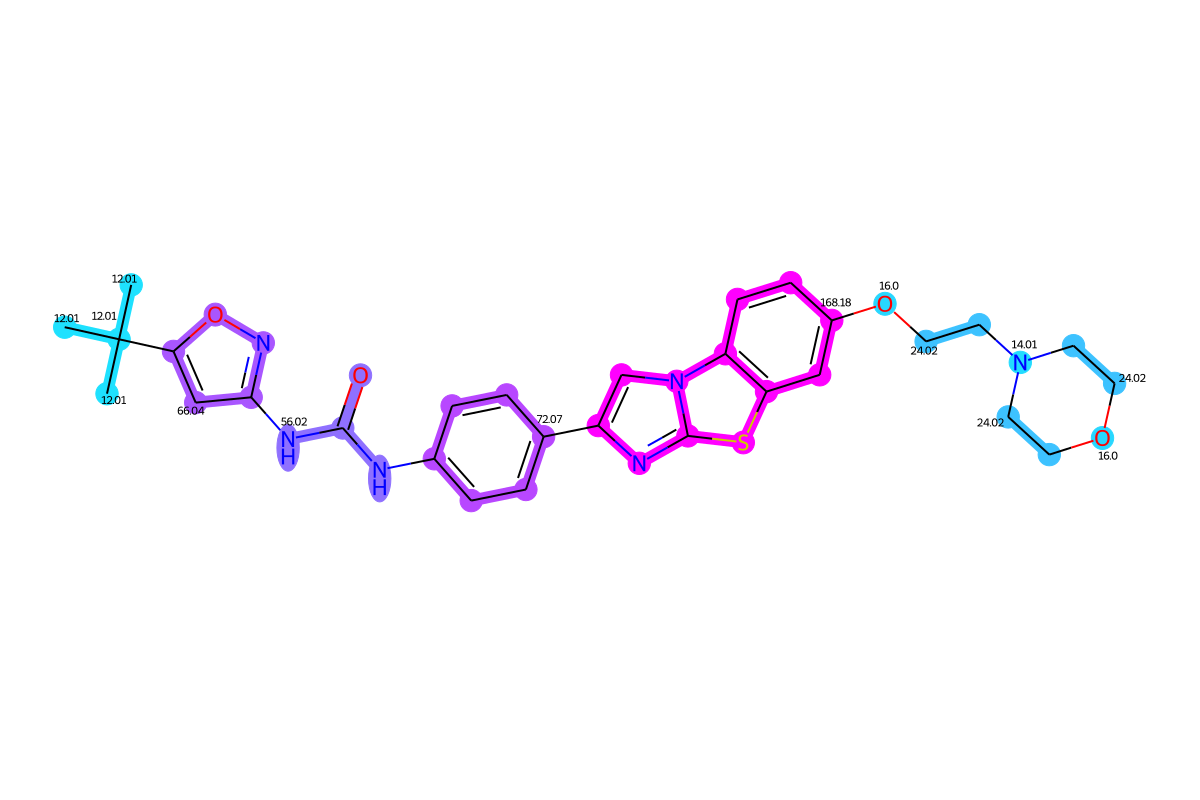

In [24]:
prettymol(mol, asMol=True, highlights=highlights, label='score', imgsize=(1200, 800), path='sample_mol.svg', score=tmp_score_map)

# Compute FG saliency scores

In [25]:
from utils_decoding import make_ss_dict, make_edge_dict, draw_mol_saliency_scores
from torch_geometric.loader import DataLoader
import torch
from utils_data import TestbedDataset

/home/conghao001/miniconda3/envs/gnndrug/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [45]:
branch_folder = 'root_folder/root_119'
explanation_type = 'phenomenon'
model_name = 'WIRGAT'

d_edge_path = branch_folder + '/Saliency/GNNExplainer/Bonds/' + explanation_type + '/' + model_name
d_node_path = branch_folder + '/Saliency/GNNExplainer/Atoms/' + explanation_type + '/' + model_name

In [27]:
_, node_sal_dict, edge_sal_dict = make_ss_dict(d_node_path, d_edge_path)
# smiles_dict, edge_idx_dict = make_edge_dict(test_loader)

In [28]:
node_sal_dict

{'Tretinoin': array([0.08257083, 0.08210842, 0.08327109, 0.08237982, 0.08252423,
        0.08338458, 0.08252586, 0.08193996, 0.08316824, 0.08241409,
        0.08323976, 0.0829288 , 0.08317991, 0.08437258, 0.08382218,
        0.08301239, 0.08340917, 0.08233943, 0.08230669, 0.08258195,
        0.0810194 , 0.08205817], dtype=float32),
 'Shikonin': array([0.08142795, 0.08185134, 0.08148864, 0.08231318, 0.08349385,
        0.08263852, 0.08193413, 0.08282476, 0.08257023, 0.08248145,
        0.08265839, 0.08224813, 0.08254626, 0.08328507, 0.08195824,
        0.08318722, 0.08149386, 0.08474129, 0.08221335, 0.08370709,
        0.0823442 ], dtype=float32),
 'JQ1': array([0.08295843, 0.08141354, 0.08210944, 0.08197245, 0.08284507,
        0.08217505, 0.08242619, 0.08301882, 0.08218014, 0.08275793,
        0.0829441 , 0.08279664, 0.08169205, 0.08213802, 0.08276084,
        0.08326134, 0.08255066, 0.0821347 , 0.08235627, 0.08348791,
        0.08189403, 0.08318311, 0.08200153, 0.08257408, 0.08261152

In [29]:
edge_sal_dict

{'Tretinoin': array([0.16866042, 0.16766642, 0.26193973, 0.3737214 , 0.28040487,
        0.3363762 , 0.13072321, 0.39288184, 0.22475398, 0.24332006,
        0.20609714, 0.15025072, 0.22499137, 0.20611134, 0.16864313,
        0.26202112, 0.224814  , 0.26213855, 0.26202536, 0.26179618,
        0.22407176, 0.2613032 , 0.24325804, 0.24271761, 0.24312238,
        0.2811607 , 0.20609652, 0.20591143, 0.2621227 , 0.2246991 ,
        0.3180581 , 0.28054404, 0.2808111 , 0.22464076, 0.27986538,
        0.2060268 , 0.24319524, 0.22462879, 0.2993674 , 0.2618984 ,
        0.22487348, 0.24349259, 0.22453007, 0.22458147], dtype=float32),
 'Shikonin': array([0.30974522, 0.21267968, 0.21284755, 0.309626  , 0.25139353,
        0.27151904, 0.23253463, 0.2907851 , 0.27129242, 0.21288143,
        0.19332702, 0.19359712, 0.2322628 , 0.29078102, 0.2907443 ,
        0.25158745, 0.32938486, 0.25195342, 0.31015018, 0.29075667,
        0.27135503, 0.30981615, 0.19317909, 0.3294095 , 0.31017804,
        0.31021723

In [51]:
dataset = 'GDSC'
test_data = TestbedDataset(root=branch_folder, dataset=dataset+'_test_mix')
test_batch = 1
test_loader = DataLoader(test_data[32700:], batch_size=test_batch, shuffle=False)

Pre-processed data found: root_folder/root_119/processed/GDSC_test_mix.pt, loading ...


In [52]:
print(len(test_data[32788:]))

515


In [54]:
for idx, data in enumerate(tqdm(test_loader)):
    pass

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 603/603 [00:00<00:00, 615.65it/s]


In [31]:
smiles_dict, edge_idx_dict = make_edge_dict(test_loader)
edge_idx_dict

{'Tivozanib': array([[ 0,  1,  1,  1,  2,  2,  3,  3,  3,  4,  4,  5,  5,  6,  6,  7,
          7,  7,  8,  9,  9, 10, 10, 10, 11, 11, 11, 12, 12, 13, 13, 13,
         14, 14, 15, 15, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 20, 20,
         20, 21, 21, 21, 22, 22, 23, 23, 23, 24, 24, 25, 25, 26, 26, 27,
         27, 28, 29, 29, 30, 31],
        [ 1,  0,  2,  5,  1,  3,  2,  4,  6,  3,  5,  4,  1,  3,  7,  6,
          8,  9,  7,  7, 10,  9, 11, 15, 10, 12, 31, 11, 13, 12, 14, 16,
         13, 15, 14, 10, 13, 17, 16, 18, 26, 17, 19, 23, 18, 20, 19, 21,
         29, 20, 22, 27, 21, 23, 22, 24, 18, 23, 25, 24, 26, 25, 17, 21,
         28, 27, 20, 30, 29, 11]]),
 'Cabozantinib': array([[ 0,  1,  1,  2,  2,  2,  3,  3,  4,  4,  4,  5,  5,  5,  6,  6,
          7,  7,  8,  8,  9,  9,  9, 10, 10, 11, 11, 11, 12, 12, 13, 14,
         14, 15, 15, 15, 16, 16, 17, 17, 18, 18, 18, 19, 19, 20, 20, 21,
         21, 22, 22, 22, 23, 24, 24, 24, 24, 25, 25, 26, 26, 27, 27, 27,
         28, 29, 29, 30, 

In [32]:
smiles_dict

{'Tivozanib': 'CC1=CC(=NO1)NC(=O)NC2=C(C=C(C=C2)OC3=C4C=C(C(=CC4=NC=C3)OC)OC)Cl',
 'Cabozantinib': 'COC1=CC2=C(C=CN=C2C=C1OC)OC3=CC=C(C=C3)NC(=O)C4(CC4)C(=O)NC5=CC=C(C=C5)F',
 'Dactolisib': 'CC(C)(C#N)C1=CC=C(C=C1)N2C3=C4C=C(C=CC4=NC=C3N(C2=O)C)C5=CC6=CC=CC=C6N=C5',
 'KIN001-270': 'CC1=C(C=C(C=C1)NC2=NC=NC(=C2)C3=CC(=CC=C3)N4C(=O)C5=CC=CC=C5C4=O)NS(=O)(=O)C',
 'HG-5-88-01': 'CC(C)S(=O)(=O)C1=CC=CC=C1NC2=NC(=NC(=C2Cl)N)NC3=C(C=C(C=C3)N4CCC(CC4)C(=O)N)OC',
 'WZ3105': 'CC(C)N1C=NC2=C1N=C(N=C2NC3=CC(=CC=C3)NC(=O)C=C)NC4CCC(CC4)N(C)C',
 'GW843682X': 'COC1=C(C=C2C(=C1)N=CN2C3=CC(=C(S3)C(=O)N)OCC4=CC=CC=C4C(F)(F)F)OC',
 'Doxorubicin': 'CC1C(C(CC(O1)OC2CC(CC3=C(C4=C(C(=C23)O)C(=O)C5=C(C4=O)C=CC=C5OC)O)(C(=O)CO)O)N)O',
 'CCT007093': 'C1CC(=CC2=CC=CS2)C(=O)C1=CC3=CC=CS3',
 'Sepantronium bromide': 'CC1=[N+](C2=C(N1CCOC)C(=O)C3=CC=CC=C3C2=O)CC4=NC=CN=C4.[Br-]',
 'Linifanib': 'CC1=CC(=C(C=C1)F)NC(=O)NC2=CC=C(C=C2)C3=C4C(=CC=C3)NN=C4N',
 'Vorinostat': 'C1=CC=C(C=C1)NC(=O)CCCCCCC(=O)NO',
 '(5Z)-7-Oxo

In [79]:
class drug_sal:
    def __init__(self, name, smiles, node_score, edge_score, edge_idx):
        self.name = name
        self.smiles = smiles
        self.node_score = node_score
        self.edge_score = edge_score
        self.edge_idx = edge_idx
        
    def decomp_fg(self, decoding_voc):
        self.mol = Chem.MolFromSmiles(self.smiles)
        self.fg, self.non_fg, self.fg_idx, self.non_fg_idx = mol2frag(self.mol, toEnd=True, vocabulary=list(decoding_voc), returnidx=True)
        self.fg_atom_idx = [idx for subtuple in self.fg_idx for idx in subtuple]
        self.non_fg_atom_idx = [idx for subtuple in self.non_fg_idx for idx in subtuple]
        self.group_atom_idx = []
        self.single_atom_idx = []
        for subtuple in self.fg_idx+self.non_fg_idx:
            if len(subtuple) == 1:
                self.single_atom_idx.append(subtuple[0])
            else:
                self.group_atom_idx.append([idx for idx in subtuple])
#                 self.group_atom_idx += subtuple
        print(self.single_atom_idx, self.group_atom_idx)
        
    def compute_sal_score(self):
        # node:
#         stand_node_sal = -1 + 2*(self.node_score - self.node_score.min())/(self.node_score.max() - self.node_score.min())
        stand_node_sal = (self.node_score - self.node_score.min())/(self.node_score.max() - self.node_score.min())
        stand_node_sal = stand_node_sal.round(2)
        new_sal_dict = {i:stand_node_sal[i] for i in self.single_atom_idx}
        
        for idxes in self.group_atom_idx:
            num = len(idxes)
            fg_sal = [stand_node_sal[i] for i in idxes]
            fg_score = sum(fg_sal)/num
            new_sal_dict[idxes[0]] = fg_score
            
        self.node_sal_dict = new_sal_dict    # this is a dict
        
        # edge:
        edge_ss_dict = defaultdict(float)
        counts = defaultdict(int)
        for val, x, y in zip(self.edge_score, *self.edge_idx):
            if x > y:
                x, y = y, x
            edge_ss_dict[(x, y)] += val
            counts[(x, y)] += 1
            
        for edge, count in counts.items():
            edge_ss_dict[edge] /= count
            
        min_ss = min(edge_ss_dict.values())
        max_ss = max(edge_ss_dict.values())
        
        for edge, value in edge_ss_dict.items():
            edge_ss_dict[edge] = (value - min_ss)/(max_ss - min_ss)
#             edge_ss_dict[edge] = -1 + 2*(value - min_ss)/(max_ss - min_ss)
            edge_ss_dict[edge] = edge_ss_dict[edge].round(2)
            
        bond_weights = []
        for i, bond in enumerate(self.mol.GetBonds()):
            u, v = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
            print(u, v)
            if u > v:
                u, v = v, u
#                 continue
#             else:
#             bond_weights[i] = edge_ss_dict[(u, v)]
            bond_weights.append(edge_ss_dict[(u, v)])
            
        self.edge_sal = bond_weights    # this is a list
        
    def in_same_fg(self, atom1, atom2):
#         for fg in self.fg_idx:
#             if atom1 in fg and atom2 in fg:
#                 return True
#         return False
        for group in self.group_atom_idx:
            if atom1 in group and atom2 in group:
                return True
        return False
        
    def compute_color(self):
        my_cmap = cm.get_cmap('coolwarm')
        patt = r'[C,H][0-9]{2}[0,-1,1]'
        # Get normalize function (takes data in range [vmin, vmax] -> [0, 1])
        my_norm = Normalize(vmin=0, vmax=1)
        
        self.atommap, self.bondmap = {}, {}
        for s,i in zip(self.fg+self.non_fg, self.fg_idx+self.non_fg_idx):
            print("s and i:", s, i)
            self.atommap.update({x:my_cmap(my_norm(self.node_sal_dict[i[0]]))[:3] for x in i})
            
        for b in self.mol.GetBonds():
            b_id = b.GetIdx()
#             print(b_id)
            score = self.edge_sal[b_id]
#             if b.GetBeginAtomIdx() in self.fg_atom_idx and b.GetEndAtomIdx() in self.fg_atom_idx:    # if the bond is in FG
#                 self.bondmap[b_id] = self.atommap[b.GetBeginAtomIdx()]
#             else:    # if the bond is between FG and atoms
#                 self.bondmap[b_id] = my_cmap(my_norm(score))[:3]
            if self.in_same_fg(b.GetBeginAtomIdx(), b.GetEndAtomIdx()):
                self.bondmap[b_id] = self.atommap[b.GetBeginAtomIdx()]
            
        self.highlights = {
            "highlightAtoms": list(self.atommap.keys()),
            "highlightAtomColors": self.atommap,
            "highlightBonds": list(self.bondmap.keys()),
            "highlightBondColors": self.bondmap,
        }
        
    def draw_mol(self, asMol=False, label=None, path='', imgsize=(300, 200)):
        '''
        highlights is a dictionary, which may contains:
        highlightAtoms: list
        highlightBonds: list
        highlightAtomRadii: dict[int]=float, atom index (int), radius (float)
        highlightAtomColors: dict[int]=tuple, index (int), color (tuple, length=3)
        highlightBondColors: dict[int]=tuple,index (int), color (tuple, length=3)
        '''
        smiles = self.smiles
        node_score = self.node_sal_dict
        edge_score = self.edge_sal
        hightlights = self.highlights
        
        if asMol:
            mol = self.smiles.__copy__()
        else:
            mol = self.mol
#         try:
        mol = rdMolDraw2D.PrepareMolForDrawing(mol)
        if '.png' in path:
            drawer = rdMolDraw2D.MolDraw2DCairo(*imgsize)
        else:
            drawer = rdMolDraw2D.MolDraw2DSVG(*imgsize)
        opts = drawer.drawOptions()
        opts.annotationFontScale = 0.6
        if label == 'map':
            for i in range(mol.GetNumAtoms()):
                opts.atomLabels[i] = mol.GetAtomWithIdx(
                    i).GetSymbol()+str(mol.GetAtomWithIdx(i).GetAtomMapNum())
        if label == 'idx':
            for i in range(mol.GetNumAtoms()):
                opts.atomLabels[i] = mol.GetAtomWithIdx(i).GetSymbol()+str(i)
        if label == 'score':
            assert node_score is not None
            assert edge_score is not None
#             tmp_score_dict = score
#             atoms = mol.GetAtoms()
#             for atom_id, s in tmp_score_dict.items():
#                 atom = atoms[atom_id]
#                 atom.SetProp("atomNote", s)

            for atom in mol.GetAtoms():
                idx = atom.GetIdx()
#                 if idx in node_score.keys():
            
                if idx in self.single_atom_idx:
                    atom.SetProp("atomNote", str(round(node_score[idx], 2)))

            for bond in mol.GetBonds():
                idx = bond.GetIdx()
                if not self.in_same_fg(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()):
                    bond.SetProp("bondNote", str(round(edge_score[idx], 2)))
                           
            
        if not highlights:
            drawer.DrawMolecule(mol)
        else:
            drawer.DrawMolecule(mol, **self.highlights)
            
        conformer = mol.GetConformer()
        for fg in self.group_atom_idx:
            if len(fg) == 1:
                continue
            pox = []
            for aid in fg:
                pos = conformer.GetAtomPosition(aid)
                pox.append([pos.x, pos.y])
            print(pox)
            pox_arr = np.array(pox)
            center = np.mean(pox_arr, axis=0)
            print(center)
            print(node_score[fg[0]])
            drawer.DrawString(str(round(node_score[fg[0]], 2)), Geometry.Point2D(center[0], center[1]))
            
        drawer.FinishDrawing()
        if '.png' in path:
            drawer.WriteDrawingText(path)
            display(Image(path))
        else:
            svg = drawer.GetDrawingText()
            display(SVG(svg.replace('svg:','')))
            if '.svg' in path:
                with open(path, 'w') as wf:
                    print(svg, file=wf)
        return drawer
#         except Exception as e:
#             print("Check your molecule!!!",e)
#             return

In [80]:
test_drug = 'Embelin'
node_score = node_sal_dict[test_drug]
edge_score = edge_sal_dict[test_drug]
edge_idx = edge_idx_dict[test_drug]
smiles = smiles_dict[test_drug]

In [81]:
Tram = drug_sal(test_drug, smiles, node_score, edge_score, edge_idx)

In [82]:
Tram.decomp_fg(decoding_voc)

[] [[14, 13, 15, 16, 19, 17, 18, 11, 12, 20], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]


In [83]:
Tram.fg_idx, Tram.non_fg_idx

([(14, 13, 15, 16, 19, 17, 18, 11, 12, 20)],
 [(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)])

In [84]:
Tram.compute_sal_score()
Tram.node_sal_dict, Tram.edge_sal

0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10
10 11
11 12
12 13
13 14
13 15
15 16
16 17
17 18
16 19
12 20
17 11


({14: 0.6990000039339066, 0: 0.5936363637447357},
 [0.53,
  0.37,
  0.38,
  0.7,
  0.58,
  0.95,
  0.25,
  0.44,
  0.23,
  0.24,
  0.09,
  0.74,
  0.48,
  0.63,
  0.63,
  0.63,
  0.42,
  0.26,
  0.85,
  0.0,
  1.0])

In [85]:
Tram.node_sal_dict

{14: 0.6990000039339066, 0: 0.5936363637447357}

In [86]:
Tram.compute_color()
Tram.highlights

s and i: O=C1C=C(O)C(=O)C=C1O (14, 13, 15, 16, 19, 17, 18, 11, 12, 20)
s and i: CCCCCCCCCCC (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)


{'highlightAtoms': [14,
  13,
  15,
  16,
  19,
  17,
  18,
  11,
  12,
  20,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10],
 'highlightAtomColors': {14: (0.9688941583333334,
   0.679479563427451,
   0.5628122911529412),
  13: (0.9688941583333334, 0.679479563427451, 0.5628122911529412),
  15: (0.9688941583333334, 0.679479563427451, 0.5628122911529412),
  16: (0.9688941583333334, 0.679479563427451, 0.5628122911529412),
  19: (0.9688941583333334, 0.679479563427451, 0.5628122911529412),
  17: (0.9688941583333334, 0.679479563427451, 0.5628122911529412),
  18: (0.9688941583333334, 0.679479563427451, 0.5628122911529412),
  11: (0.9688941583333334, 0.679479563427451, 0.5628122911529412),
  12: (0.9688941583333334, 0.679479563427451, 0.5628122911529412),
  20: (0.9688941583333334, 0.679479563427451, 0.5628122911529412),
  0: (0.9434315296666667, 0.8022762536156862, 0.7291715979137255),
  1: (0.9434315296666667, 0.8022762536156862, 0.7291715979137255),
  2: (0.9434315296666667, 0.8022

[[5.030456153143275, 3.2238936835974763], [4.913237764010668, 1.7284807475663766], [6.149694161195171, 0.8792601767712986], [6.032475772062565, -0.6161527592598022], [7.268932169247068, -1.4653733300548795], [4.678800985745454, -1.2623451244958257], [4.561582596612848, -2.7577580605269265], [3.4423445885609505, -0.41312455370074797], [3.5595629776935573, 1.082288382330354], [2.3231065805090534, 1.9315089531254324]]
[4.79601937 0.23306781]
0.6990000039339066
[[-10.861986115264228, -0.044175891141504664], [-9.50831132894712, 0.6020164740945195], [-8.271854931762615, -0.24720409670055687], [-6.918180145445504, 0.3989882685354669], [-5.6817237482610015, -0.45023230225960975], [-4.328048961943891, 0.19596006297641355], [-3.091592564759387, -0.6532605078186638], [-1.7379177784422775, -0.007068142582639991], [-0.5014613812577736, -0.8562887133777175], [0.8522134050593365, -0.21009634814169392], [2.08866980224384, -1.0593169189367715]]
[-4.36001761 -0.21187983]
0.5936363637447357


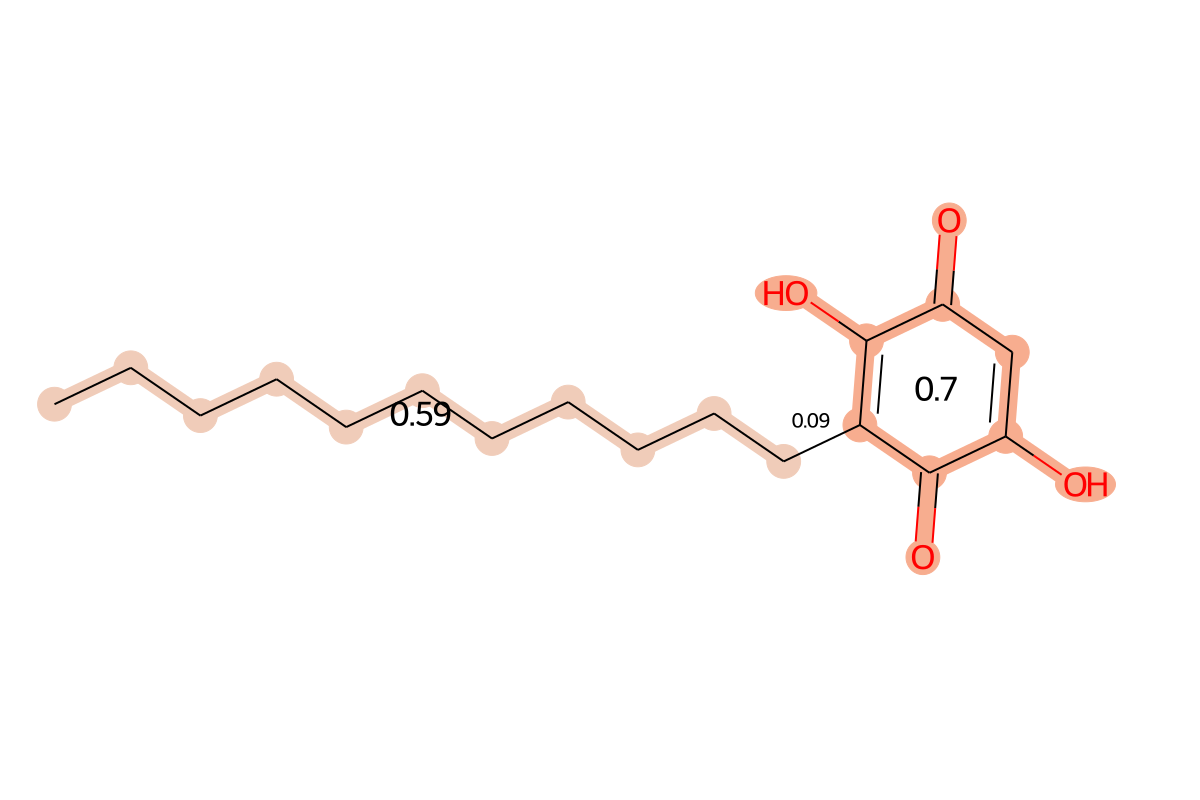

In [87]:
Tram.draw_mol(asMol=False, label='score', imgsize=(1200, 800), path='sample_mol.svg')